# CrossTx

**Panagiotis Chrysinas, Changyou Chen, Rudiyanto Gunawan**
**University at Buffalo-SUNY, Buffalo, NY 14260**

This script is an implementation of CrossTx, a tool for predicting drug transcriptional signatures in an unseen target cell line using reference drug signature data from CMap and background transcriptome data of the target cell line. CrossTx comprises two components: Predictor and Corrector. The Predictor employs averaging or linear regression model to generate cell line-agnostic drug signatures using the reference data. The Corrector generates target cell-specific drug signature by correcting / projecting the output of the Predictor onto the latent transcriptomic space of the target cell line. For the Corrector, the projection is implemented either using the Principal Component Analysis (PCA) projection or an Autoencoder.

![crosstx_main_photo.png](attachment: crosstx_main_photo.png)

In [1]:
# import modules
from crosstx_functions_wind import *
%matplotlib inline
plt.style.use('seaborn-notebook')

## Load Data/Metadata



In [2]:
# Loading CMap dataset    
with open('data_per_cell_table_full.pkl','rb') as f:
             full_deepce_data=pkl.load(f)
                         
# Load the list of drugs whose transcriptome signatures are to be generated
# These drugs are the top 100 in terms of the number of samples in the dataset.
with open('top100_drugs_list.pkl','rb') as f:
             top100_drugs_list=pkl.load(f)             
        
# Load ground truth drug transcriptomic signatures for the top 100 drugs
with open('data_mat_nan.pkl','rb') as f:
             data_mat_nan=pkl.load(f)
             
# Load drugload indices for each of the top 100 drugs in each target cell line
with open('drugload_indices.pkl','rb') as f:
             drugload_indices=pkl.load(f)
             
# Load CMap data (grouped by drugs)
with open('data_mat_final.pkl','rb') as f:
             data_mat_final=pkl.load(f)
        
# Load metadata on drug concentration values for each cell line for the 100 drugs    
with open('conc_final.pkl','rb') as f:
             conc_final=pkl.load(f)
        
# Load metadata on unique (union) drug concentration values for the 100 drugs 
with open('union_conc_val.pkl','rb') as f:
             union_conc_val=pkl.load(f)
        
# Load reference data (i.e., CMap dataset minus the target cell line)
with open('data_mat_final_allexk.pkl','rb') as f:
             data_mat_final_allexk=pkl.load(f)
        
# Load concentration values (conc_final) for all the cell lines minus the target cell line
with open('conc_final_allexk.pkl','rb') as f:
             conc_final_allexk=pkl.load(f)


### Create and train the neural network model (Autoencoder)


Instructions for updating:
Colocations handled automatically by placer.
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 978)]             0         
_________________________________________________________________
dense (Dense)                (None, 150)               146850    
_________________________________________________________________
batch_normalization (BatchNo (None, 150)               600       
_________________________________________________________________
activation (Activation)      (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_____________________________________________________

C:\Users\rudig\anaconda3\lib\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 2/300
900/900 [==============================] - 0s 181us/sample - loss: 26.5969 - mse: 26.5969 - R2: -6.1326 - val_loss: 11.6921 - val_mse: 11.6921 - val_R2: -2.1873
Epoch 3/300
900/900 [==============================] - 0s 182us/sample - loss: 20.3348 - mse: 20.3348 - R2: -4.5140 - val_loss: 13.2854 - val_mse: 13.2854 - val_R2: -2.5945
Epoch 4/300
900/900 [==============================] - 0s 183us/sample - loss: 16.8625 - mse: 16.8625 - R2: -3.6100 - val_loss: 13.3518 - val_mse: 13.3518 - val_R2: -2.6763
Epoch 5/300
900/900 [==============================] - 0s 157us/sample - loss: 14.7995 - mse: 14.7995 - R2: -3.0291 - val_loss: 13.8465 - val_mse: 13.8465 - val_R2: -2.7903
Epoch 6/300
900/900 [==============================] - 0s 167us/sample - loss: 13.8866 - mse: 13.8866 - R2: -2.7596 - val_loss: 13.5347 - val_mse: 13.5347 - val_R2: -2.9672
Epoch 7/300
900/900 [==============================] - 0s 191us/sample - loss: 12.7610 - mse: 12.7610 - R2: -2.4670 - val_loss: 11.9874

Epoch 50/300
900/900 [==============================] - 0s 164us/sample - loss: 3.2971 - mse: 3.2971 - R2: 0.1112 - val_loss: 2.7228 - val_mse: 2.7228 - val_R2: 0.1822
Epoch 51/300
900/900 [==============================] - 0s 173us/sample - loss: 3.0154 - mse: 3.0154 - R2: 0.1829 - val_loss: 2.4304 - val_mse: 2.4304 - val_R2: 0.3042
Epoch 52/300
900/900 [==============================] - 0s 181us/sample - loss: 2.6521 - mse: 2.6521 - R2: 0.2788 - val_loss: 2.2000 - val_mse: 2.2000 - val_R2: 0.3465
Epoch 53/300
900/900 [==============================] - 0s 167us/sample - loss: 2.3895 - mse: 2.3895 - R2: 0.3544 - val_loss: 1.9644 - val_mse: 1.9644 - val_R2: 0.4455
Epoch 54/300
900/900 [==============================] - 0s 163us/sample - loss: 2.0840 - mse: 2.0840 - R2: 0.4375 - val_loss: 1.7091 - val_mse: 1.7091 - val_R2: 0.5144
Epoch 55/300
900/900 [==============================] - 0s 177us/sample - loss: 1.8362 - mse: 1.8362 - R2: 0.5053 - val_loss: 1.5352 - val_mse: 1.5352 - val_R2:

Epoch 99/300
900/900 [==============================] - 0s 186us/sample - loss: 0.7006 - mse: 0.7006 - R2: 0.8117 - val_loss: 0.7544 - val_mse: 0.7544 - val_R2: 0.7884
Epoch 100/300
900/900 [==============================] - 0s 209us/sample - loss: 0.7064 - mse: 0.7064 - R2: 0.8090 - val_loss: 0.7518 - val_mse: 0.7518 - val_R2: 0.7881
Epoch 101/300
900/900 [==============================] - 0s 184us/sample - loss: 0.6836 - mse: 0.6836 - R2: 0.8147 - val_loss: 0.7517 - val_mse: 0.7517 - val_R2: 0.7858
Epoch 102/300
900/900 [==============================] - 0s 190us/sample - loss: 0.6975 - mse: 0.6975 - R2: 0.8101 - val_loss: 0.7460 - val_mse: 0.7460 - val_R2: 0.7955
Epoch 103/300
900/900 [==============================] - 0s 173us/sample - loss: 0.6978 - mse: 0.6978 - R2: 0.8122 - val_loss: 0.7445 - val_mse: 0.7445 - val_R2: 0.7888
Epoch 104/300
900/900 [==============================] - 0s 174us/sample - loss: 0.6757 - mse: 0.6757 - R2: 0.8183 - val_loss: 0.7435 - val_mse: 0.7435 - va

900/900 [==============================] - 0s 182us/sample - loss: 0.5887 - mse: 0.5887 - R2: 0.8415 - val_loss: 0.6455 - val_mse: 0.6455 - val_R2: 0.8167
Epoch 148/300
900/900 [==============================] - 0s 183us/sample - loss: 0.5609 - mse: 0.5609 - R2: 0.8482 - val_loss: 0.6432 - val_mse: 0.6432 - val_R2: 0.8215
Epoch 149/300
900/900 [==============================] - 0s 185us/sample - loss: 0.5701 - mse: 0.5701 - R2: 0.8466 - val_loss: 0.6401 - val_mse: 0.6401 - val_R2: 0.8294
Epoch 150/300
900/900 [==============================] - 0s 183us/sample - loss: 0.5745 - mse: 0.5745 - R2: 0.8450 - val_loss: 0.6389 - val_mse: 0.6389 - val_R2: 0.8210
Epoch 151/300
900/900 [==============================] - 0s 184us/sample - loss: 0.5703 - mse: 0.5703 - R2: 0.8456 - val_loss: 0.6387 - val_mse: 0.6387 - val_R2: 0.8180
Epoch 152/300
900/900 [==============================] - 0s 178us/sample - loss: 0.5813 - mse: 0.5813 - R2: 0.8426 - val_loss: 0.6359 - val_mse: 0.6359 - val_R2: 0.8335


900/900 [==============================] - 0s 162us/sample - loss: 0.4917 - mse: 0.4917 - R2: 0.8672 - val_loss: 0.5734 - val_mse: 0.5734 - val_R2: 0.8446
Epoch 196/300
900/900 [==============================] - 0s 165us/sample - loss: 0.4999 - mse: 0.4999 - R2: 0.8650 - val_loss: 0.5735 - val_mse: 0.5735 - val_R2: 0.8436
Epoch 197/300
900/900 [==============================] - 0s 167us/sample - loss: 0.4981 - mse: 0.4981 - R2: 0.8649 - val_loss: 0.5746 - val_mse: 0.5746 - val_R2: 0.8341
Epoch 198/300
900/900 [==============================] - 0s 196us/sample - loss: 0.4872 - mse: 0.4872 - R2: 0.8673 - val_loss: 0.5702 - val_mse: 0.5702 - val_R2: 0.8410
Epoch 199/300
900/900 [==============================] - 0s 165us/sample - loss: 0.4870 - mse: 0.4870 - R2: 0.8684 - val_loss: 0.5677 - val_mse: 0.5677 - val_R2: 0.8411
Epoch 200/300
900/900 [==============================] - 0s 164us/sample - loss: 0.4882 - mse: 0.4882 - R2: 0.8685 - val_loss: 0.5661 - val_mse: 0.5661 - val_R2: 0.8460


900/900 [==============================] - 0s 171us/sample - loss: 0.4549 - mse: 0.4549 - R2: 0.8754 - val_loss: 0.5251 - val_mse: 0.5251 - val_R2: 0.8557
Epoch 244/300
900/900 [==============================] - 0s 171us/sample - loss: 0.4423 - mse: 0.4423 - R2: 0.8799 - val_loss: 0.5218 - val_mse: 0.5218 - val_R2: 0.8538
Epoch 245/300
900/900 [==============================] - 0s 167us/sample - loss: 0.4404 - mse: 0.4404 - R2: 0.8814 - val_loss: 0.5222 - val_mse: 0.5222 - val_R2: 0.8628
Epoch 246/300
900/900 [==============================] - 0s 229us/sample - loss: 0.4425 - mse: 0.4425 - R2: 0.8804 - val_loss: 0.5216 - val_mse: 0.5216 - val_R2: 0.8511
Epoch 247/300
900/900 [==============================] - 0s 162us/sample - loss: 0.4234 - mse: 0.4234 - R2: 0.8856 - val_loss: 0.5187 - val_mse: 0.5187 - val_R2: 0.8608
Epoch 248/300
900/900 [==============================] - 0s 169us/sample - loss: 0.4252 - mse: 0.4252 - R2: 0.8846 - val_loss: 0.5170 - val_mse: 0.5170 - val_R2: 0.8602


900/900 [==============================] - 0s 169us/sample - loss: 0.3838 - mse: 0.3838 - R2: 0.8960 - val_loss: 0.4957 - val_mse: 0.4957 - val_R2: 0.8673
Epoch 292/300
900/900 [==============================] - 0s 192us/sample - loss: 0.4023 - mse: 0.4023 - R2: 0.8917 - val_loss: 0.4878 - val_mse: 0.4878 - val_R2: 0.8626
Epoch 293/300
900/900 [==============================] - 0s 171us/sample - loss: 0.3873 - mse: 0.3873 - R2: 0.8951 - val_loss: 0.4888 - val_mse: 0.4888 - val_R2: 0.8672
Epoch 294/300
900/900 [==============================] - 0s 181us/sample - loss: 0.3937 - mse: 0.3937 - R2: 0.8939 - val_loss: 0.4868 - val_mse: 0.4868 - val_R2: 0.8628
Epoch 295/300
900/900 [==============================] - 0s 186us/sample - loss: 0.3955 - mse: 0.3955 - R2: 0.8904 - val_loss: 0.4876 - val_mse: 0.4876 - val_R2: 0.8620
Epoch 296/300
900/900 [==============================] - 0s 170us/sample - loss: 0.3902 - mse: 0.3902 - R2: 0.8950 - val_loss: 0.4864 - val_mse: 0.4864 - val_R2: 0.8643


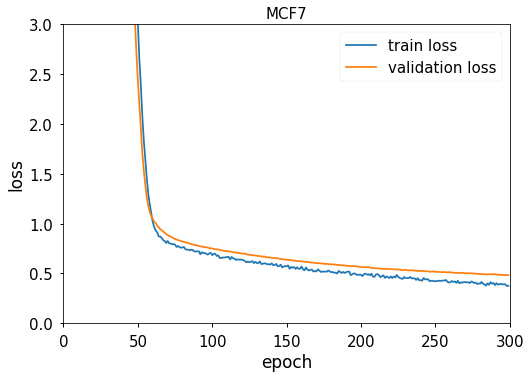

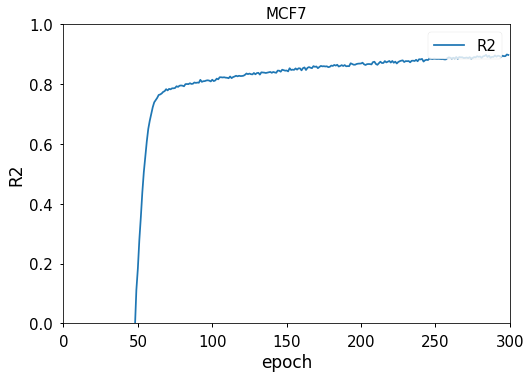

In [3]:
np.random.seed(123)
tf.random.set_seed(456)
list_cell_lines_names=['MCF7','A375','HT29','PC3', 'HA1E','YAPC','HELA']
numb_drugs=100
numb_genes=978
num_cell_lines=7

# Set landmark gene names
gene_names=full_deepce_data[0].columns[5:]

# Convert data matrix to dataframes
data_mat_nan1=data_mat_nan.copy()
data_mat_nan_pd=[]
for i1 in range(0, num_cell_lines):
    data_mat_nan_pd.append(pd.DataFrame(data_mat_nan1[i1], columns=gene_names.transpose()))

# Set autoencoder hyperparameters    
features_nr=978
latent_dim=100
hidden_layer_dim=150
test_set_percent = 0.1
num_epochs=300  
size_batch=40
optim = adam_v2.Adam(learning_rate=0.001)

# Fonts sizes for the R2, train and validation loss plots during the training of the autoencoder
SMALL_SIZE = 15
MEDIUM_SIZE = 17
BIGGER_SIZE = 20

# Build autoencoder for MCF7 in this example      
for i in [0]: 
    
    # Load background data    
    full_data = full_deepce_data[i].drop(full_deepce_data[i].columns[np.arange(0,5)], axis=1) 
    
    # Split background dataset to test and train parts
    lincs_train_df, lincs_test_df= train_test_split(full_data, test_size=test_set_percent, random_state=50)
    
    # Set encoder parameters
    e_i = Input(shape=(features_nr, ), name='encoder_input')
    encoded = layers.Dense(hidden_layer_dim, kernel_initializer=glorot_uniform(seed=123))(e_i)
    encoded_batchnorm=BatchNormalization()(encoded)
    encoded_activ = Activation('tanh')(encoded_batchnorm)
    encoded1 = layers.Dense(latent_dim, kernel_initializer=glorot_uniform(seed=123))(encoded_activ)
    encoded_batchnorm1=BatchNormalization()(encoded1)
    l_s = Activation('tanh')(encoded_batchnorm1)
    
    # Instantiate encoder
    encoder = Model(e_i, l_s, name='encoder')
    encoder.summary()

    # Set decoder parameters
    d_i   = Input(shape=(latent_dim, ), name='decoder_input')
    decoded0 = layers.Dense(hidden_layer_dim, kernel_initializer=glorot_uniform(seed=123))(d_i)
    decoded_batchnorm=BatchNormalization()(decoded0)
    decoded_activ = Activation('tanh')(decoded_batchnorm)
    decoded1 = layers.Dense(features_nr, kernel_initializer=glorot_uniform(seed=123))(decoded_activ)
    decoded_batchnorm1=BatchNormalization()(decoded1)
    decoded = Activation('tanh')(decoded_batchnorm1)
    
    # Instantiate decoder
    decoder = Model(d_i, decoded, name='decoder')
    decoder.summary()

    # Instantiate and compile autoencoder
    autoencoder_outputs = 10*decoder(encoder(e_i))
    autoencoder = Model(e_i, autoencoder_outputs, name='autoencoder')
    autoencoder.summary()
    autoencoder.compile(optimizer=optim, loss='mse',metrics=['mse',R2])

    # Train autoencoder
    H=autoencoder.fit(lincs_train_df,lincs_train_df,
                epochs=num_epochs,
                batch_size=size_batch,
                shuffle=True,
                validation_data=(lincs_test_df,lincs_test_df))
   
    # Assess autoencoder training
    plt.figure()
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.plot(H.history['loss'])
    plt.plot(H.history['val_loss'])
    plt.title(list_cell_lines_names[i])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss', 'validation loss'], loc='upper right');
    plt.axis([0, 300, 0, 3])

    plt.figure()
    plt.plot(H.history['R2'])

    plt.title(list_cell_lines_names[i])
    plt.ylabel('R2')
    plt.xlabel('epoch')
    plt.legend(['R2'], loc='upper right');
    plt.axis([0, 300, 0, 1])
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## PREDICTOR using Mean and Regression method

In [4]:
mean=[]
regression=[]

# Target cell line is MCF7 in this example
for i1 in [0]:
    
    # Run Predictor using Mean method
    mean.append(mean_method(data_mat_nan_pd,union_conc_val,drugload_indices,i1,numb_drugs))
    
    # Run Predictor using Regression method
    regression.append(regression_method(data_mat_final_allexk,conc_final_allexk,data_mat_final,conc_final,i1,numb_genes,numb_drugs))


C:\Users\rudig\Desktop\Panos\cross_tx_demo\cross_tx_demo\crosstx_functions_wind.py:52: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  pred_final_mat=pd.concat(data_mat_nan_pd1).mean(skipna=True,level=0)


## CORRECTOR using PCA projection



In [5]:
# preallocation
indiv_drug = [[0]*numb_drugs for i in range(num_cell_lines)]
all_drugs_minus_indiv_drug= [ [0]*numb_drugs for i in range(num_cell_lines)]
pca_proj_mean=[[None]*numb_drugs for i in range(0,num_cell_lines)]
pca_proj_regression=[[None]*numb_drugs for i in range(0,num_cell_lines)]

# Set the number of nearest neighbors
num_nn=5

# Set explained variation threshold
expl_var=.85     

# Target cell line is MCF7 in this example
for i in [0]:
    
    # Find non-empty drug indices for the target cell line
    non_empty_cells_indices=[i2 for i2,x in enumerate(mean[i]) if x is not None]
    
    for i1 in non_empty_cells_indices:
        
        # Prepare background data (all the full data for the MCF7 cell line minus the data for the i1-th drug)
        indiv_drug[i][i1]=ismember(full_deepce_data[i]['pert_id'],top100_drugs_list[i1])    
        all_drugs_minus_indiv_drug[i][i1]= ~ indiv_drug[i][i1][0]        
        data_mat_genes=full_deepce_data[i].values[:,np.arange(5,983)]    
        bg_data=data_mat_genes[all_drugs_minus_indiv_drug[i][i1],:]

        # Find nearest neighbors of the output of the Mean method
        nn_pca_find_mean=find_nearest_neighbors(mean[i],bg_data,num_nn,i1)
        
        # Find nearest neighbors of the output of the Regression method
        nn_pca_find_regession=find_nearest_neighbors(regression[i],bg_data,num_nn,i1)

        # PCA projection of the output of the Mean Method (i.e., Mean+PCA method)         
        pca_proj_mean[i][i1]=pca_projection(mean[i],nn_pca_find_mean,expl_var,i1)
        
        # PCA projection of the output of the Regression Method (i.e., Regression+PCA method)         
        pca_proj_regression[i][i1]=pca_projection(regression[i],nn_pca_find_regession,expl_var,i1)

## CORRECTOR using Autoencoder

In [6]:
# preallocation
mean_ae=[[None]*numb_drugs for i in range(0,num_cell_lines)]
regression_ae=[[None]*numb_drugs for i in range(0,num_cell_lines)]
mean_pca_proj_ae=[[None]*numb_drugs for i in range(0,num_cell_lines)]
regression_pca_proj_ae=[[None]*numb_drugs for i in range(0,num_cell_lines)]
    
# Target cell line is MCF7 in this example
for i in [0]:
        
    # Find non-empty drug indices for the target cell line
    non_empty_cells_indices1=[i2 for i2,x in enumerate(pca_proj_mean[i]) if  (x is not None) and (len(x)>0)]
    
    for i1 in non_empty_cells_indices1:
        
        # AE projection of the output of the Mean method (i.e., Mean+AE method)
        mean_ae[i][i1]=autoencoder.predict(np.array(mean[i][i1].transpose()))
        
        # AE projection of the output of the Mean+PCA method (i.e., Mean+PCA+AE method)
        mean_pca_proj_ae[i][i1]=autoencoder.predict(np.array(pca_proj_mean[i][i1]))
        
        # AE projection of the output of the Regression method (i.e., Regression+AE method)
        regression_ae[i][i1]=autoencoder.predict(np.array(regression[i][i1].transpose()))
        
        # AE projection of the output of the Regression+PCA method (i.e., Regression+PCA+AE method)
        regression_pca_proj_ae[i][i1]=autoencoder.predict(np.array(pca_proj_regression[i][i1]))
            

C:\Users\rudig\anaconda3\lib\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
